In [202]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import plotly.express as px
from collections import Counter 
import re
!pip install wordcloud
from wordcloud import WordCloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/39/4a/2684863905b72fceea24edaa10e3e16bc742a184042f463f3b09883d75b0/wordcloud-1.9.3-cp311-cp311-macosx_10_9_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.4/172.4 kB 1.9 MB/s eta 0:00:00a 0:00:01


In [2]:
#opening the dataset
data = pd.read_csv('../lh-ds/teste_indicium_precificacao.csv')
data.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [3]:
data.shape

(48894, 16)

In [4]:
data.info

<bound method DataFrame.info of              id                                               nome   host_id  \
0          2595                              Skylit Midtown Castle      2845   
1          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
2          3831                    Cozy Entire Floor of Brownstone      4869   
3          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
4          5099          Large Cozy 1 BR Apartment In Midtown East      7322   
...         ...                                                ...       ...   
48889  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48890  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48891  36485431            Sunny Studio at Historical Neighborhood  23492952   
48892  36485609               43rd St. Time Square-cozy single bed  30985759   
48893  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

       

In [5]:
data.dtypes

id                                 int64
nome                              object
host_id                            int64
host_name                         object
bairro_group                      object
bairro                            object
latitude                         float64
longitude                        float64
room_type                         object
price                              int64
minimo_noites                      int64
numero_de_reviews                  int64
ultima_review                     object
reviews_por_mes                  float64
calculado_host_listings_count      int64
disponibilidade_365                int64
dtype: object

In [7]:
# Check for missing values in the DataFrame
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64


In [6]:
data[['latitude', 'longitude', 'price', 'minimo_noites', 'numero_de_reviews', 'reviews_por_mes', 
      'calculado_host_listings_count', 'disponibilidade_365']].describe()

,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,38842.000000,48894.000000,48894.000000
mean,40.728951,-73.952169,152.720763,7.030085,23.274758,1.373251,7.144005,112.776169
std,0.054529,0.046157,240.156625,20.510741,44.550991,1.680453,32.952855,131.618692
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723075,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,40.763117,-73.936273,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'host_id'}>,
        <Axes: title={'center': 'latitude'}>],
       [<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimo_noites'}>],
       [<Axes: title={'center': 'numero_de_reviews'}>,
        <Axes: title={'center': 'reviews_por_mes'}>,
        <Axes: title={'center': 'calculado_host_listings_count'}>],
       [<Axes: title={'center': 'disponibilidade_365'}>, <Axes: >,
        <Axes: >]], dtype=object)

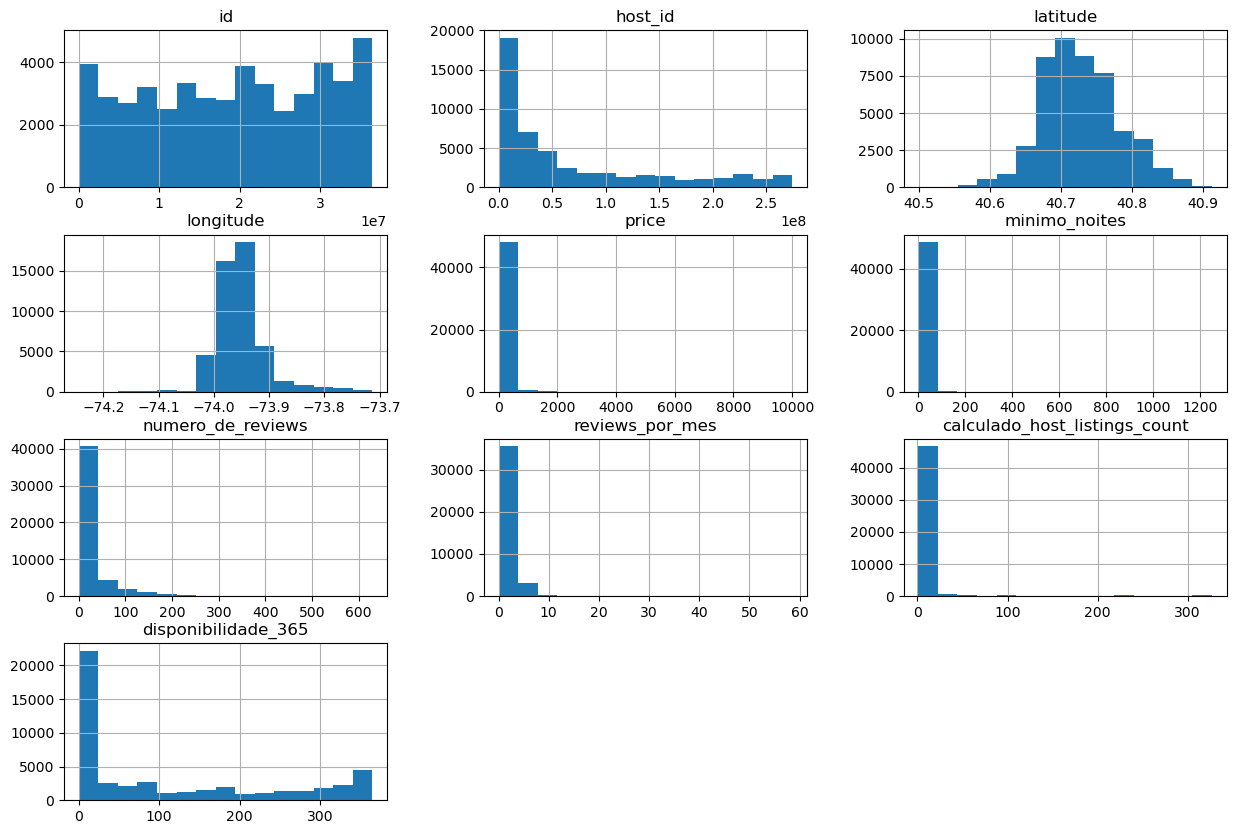

In [23]:
#Variables's distribution
data.hist(bins=15, figsize=(15,10))

In [8]:
data_price_zero = data.loc[data['price'] == 0]
data_price_zero

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
23160,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
25432,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25633,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
25752,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
25777,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73
25793,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,2019-06-15,4.28,6,176
25794,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,2019-06-21,4.37,6,232
25795,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222
26258,20933849,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,NaN,NaN,1,0
26840,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.11,6,333


In [9]:
data_price_zero.shape

(11, 16)

<Axes: xlabel='price', ylabel='Count'>

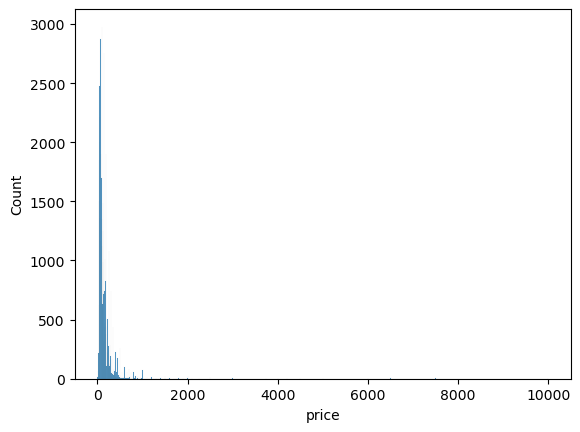

In [15]:
sns.histplot(data=data, x='price')

<Axes: xlabel='price'>

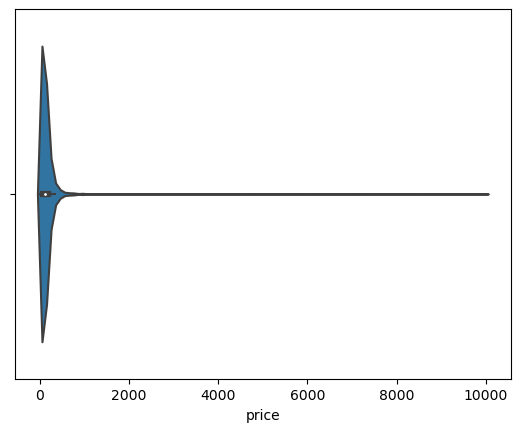

In [19]:
sns.violinplot(data = data, x = data['price'])

<Axes: xlabel='minimo_noites'>

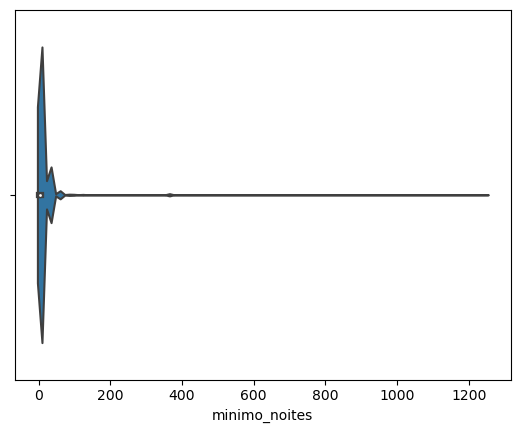

In [30]:
sns.violinplot(data = data, x = data['minimo_noites'])

In [101]:
#Removing outliers values from price and minimo_noites
percentiles = np.linspace(.05, 1, num = 20)
data[['price', 'minimo_noites', 'numero_de_reviews', 'reviews_por_mes']].describe(percentiles = percentiles)

,price,minimo_noites,numero_de_reviews,reviews_por_mes
count,48894.000000,48894.000000,48894.000000,38842.000000
mean,152.720763,7.030085,23.274758,1.373251
std,240.156625,20.510741,44.550991,1.680453
min,0.000000,1.000000,0.000000,0.010000
5%,40.000000,1.000000,0.000000,0.040000
10%,49.000000,1.000000,0.000000,0.060000
15%,55.000000,1.000000,0.000000,0.100000
20%,60.000000,1.000000,0.000000,0.140000
25%,69.000000,1.000000,1.000000,0.190000
30%,75.000000,2.000000,1.000000,0.260000


In [41]:
data_clean = data[(data['price'] >=40) & (data['price'] <= 355) & (data['minimo_noites'] <=30)]

In [39]:
data_clean.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
5,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
13,6090,West Village Nest - Superhost,11975,Alina,Manhattan,West Village,40.73530,-74.00525,Entire home/apt,120,90,27,2018-10-31,0.22,1,0
54,14377,Williamsburg 1 bedroom Apartment,56512,Joanna,Brooklyn,Williamsburg,40.70881,-73.95930,Entire home/apt,150,30,105,2019-06-22,0.90,1,30
58,15341,**Bright Nolita Apt w Doorman/Elevators/Gym**,60049,Ted,Manhattan,SoHo,40.72210,-73.99775,Entire home/apt,180,30,21,2019-06-29,0.30,1,154
62,16326,Comfortable 4-bedroom apt in family house.,63588,Dimitri,Brooklyn,Prospect Heights,40.67811,-73.96428,Entire home/apt,200,30,143,2019-01-26,1.33,2,297


<Axes: xlabel='minimo_noites', ylabel='Count'>

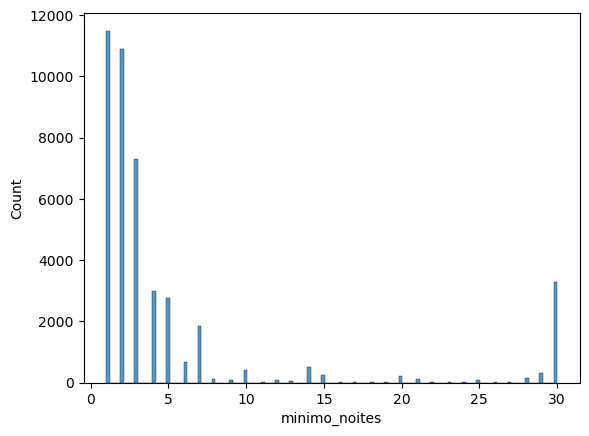

In [42]:
sns.histplot(data=data_clean, x='minimo_noites')

<Axes: xlabel='price'>

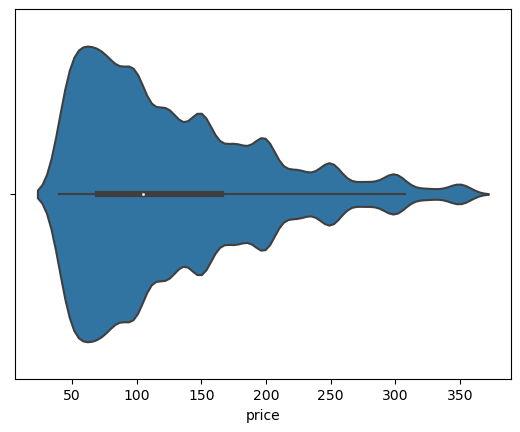

In [229]:
sns.violinplot(data = data_clean, x = 'price')

<Axes: xlabel='minimo_noites'>

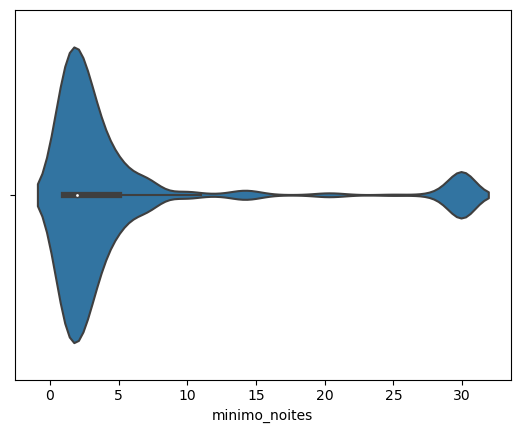

In [43]:
sns.violinplot(data = data_clean, x = data_clean['minimo_noites'])

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'host_id'}>,
        <Axes: title={'center': 'latitude'}>],
       [<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimo_noites'}>],
       [<Axes: title={'center': 'numero_de_reviews'}>,
        <Axes: title={'center': 'reviews_por_mes'}>,
        <Axes: title={'center': 'calculado_host_listings_count'}>],
       [<Axes: title={'center': 'disponibilidade_365'}>, <Axes: >,
        <Axes: >]], dtype=object)

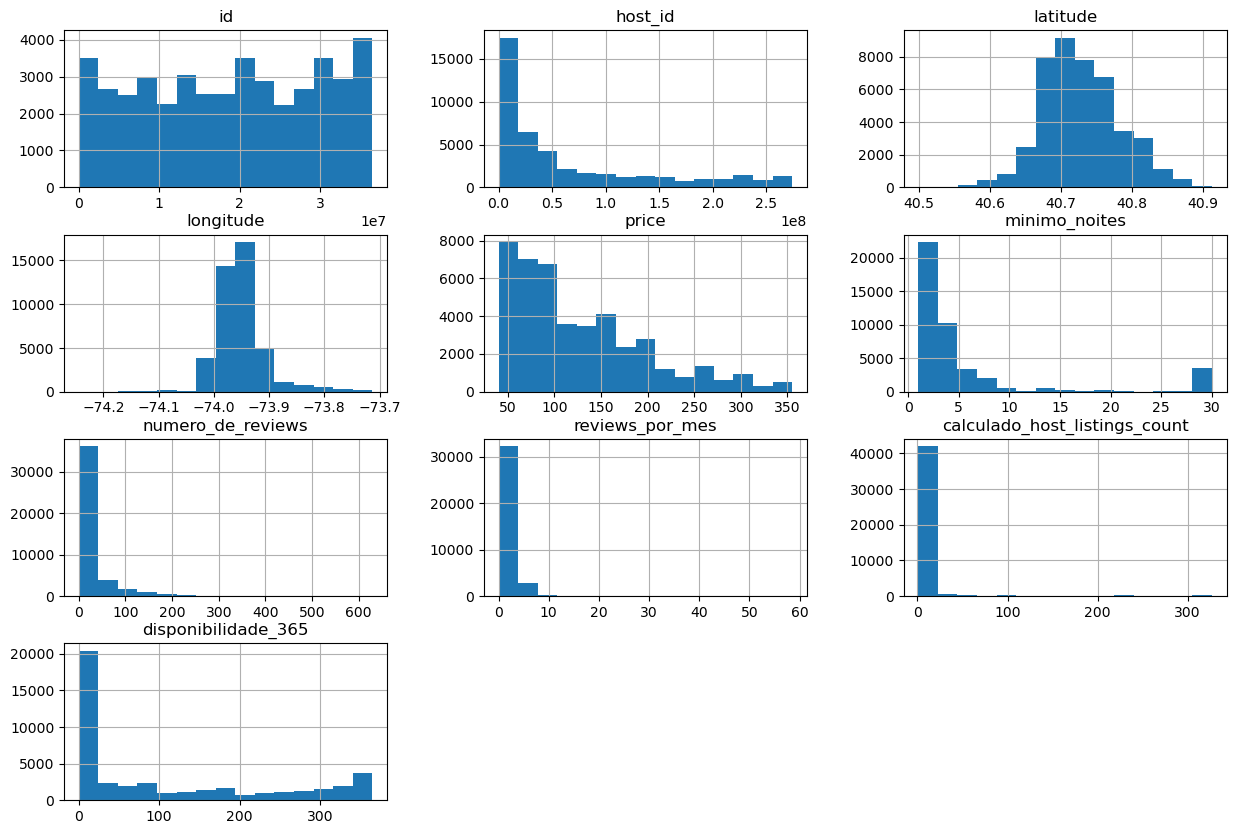

In [80]:
#Variables's distribution after removing outliers for the variables 'price' and 'minimo_noites'
data_clean.hist(bins=15, figsize=(15,10))

/Users/mariane/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



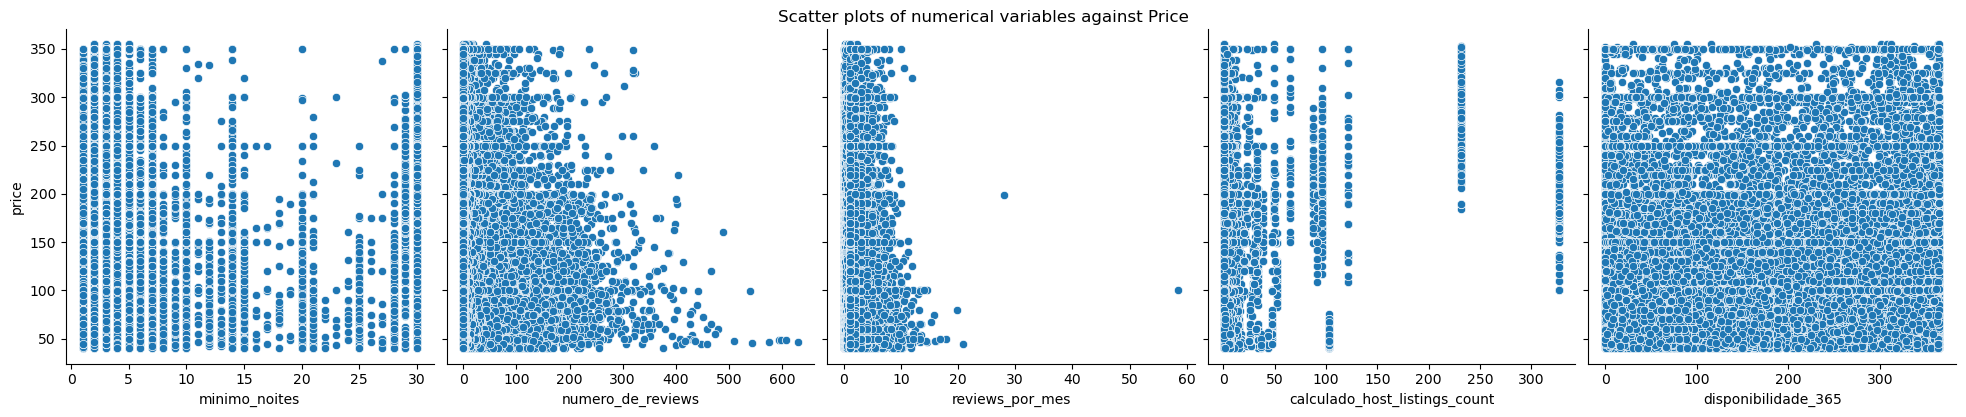

In [83]:
#Exploring the relationship between numerical variables and price

variables = ['minimo_noites', 'numero_de_reviews', 'reviews_por_mes', 'calculado_host_listings_count', 
             'disponibilidade_365']

sns.pairplot(data=data_clean, y_vars=['price'], x_vars=variables, kind='scatter', height=4)

# Set titles for each subplot
plt.suptitle("Scatter plots of numerical variables against Price", y=1.02)

# Show plot
plt.show()

In [51]:
#correlation matrix
corr = data_clean[['price', 'minimo_noites', 'numero_de_reviews', 'calculado_host_listings_count', 'disponibilidade_365']].corr()
corr


,price,minimo_noites,numero_de_reviews,calculado_host_listings_count,disponibilidade_365
price,1.000000,0.084803,-0.044408,0.172938,0.076626
minimo_noites,0.084803,1.000000,-0.146843,0.342328,0.248838
numero_de_reviews,-0.044408,-0.146843,1.000000,-0.071159,0.190782
calculado_host_listings_count,0.172938,0.342328,-0.071159,1.000000,0.230459
disponibilidade_365,0.076626,0.248838,0.190782,0.230459,1.000000


<Axes: >

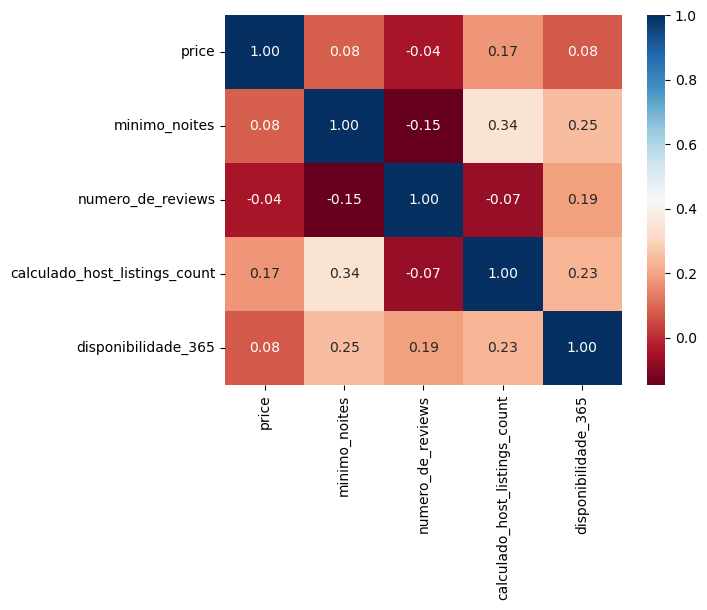

In [55]:
#using heatmap to visualize the correlations
sns.heatmap(corr, annot = True, fmt = '.2f', cmap = 'RdBu' )

In [102]:
#Checking mean prices according to room type
price_room_type = round(data_clean.groupby('room_type').price.median(), 2).sort_values(ascending=False)
price_room_type

room_type
Entire home/apt    150.0
Private room        70.0
Shared room         65.0
Name: price, dtype: float64

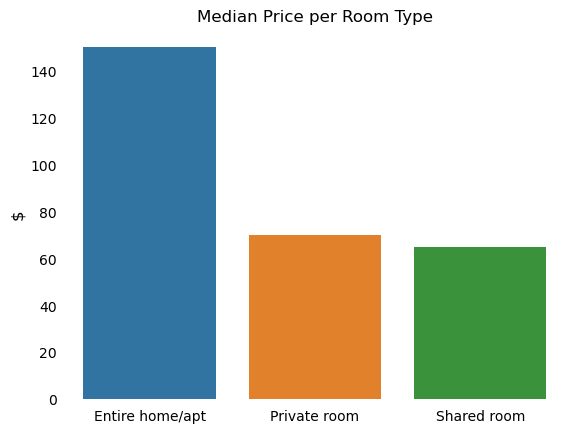

In [103]:
#visualizing the median price for each room type

ax = sns.barplot(x=price_room_type.index, y=price_room_type.values) 
ax.set_title('Median Price per Room Type')
ax.tick_params(bottom=False, top=False, left=False, right=False);
ax.set_ylabel('$', fontsize=12)
ax.set_xlabel('')
for kew, spine in ax.spines.items():
    spine.set_visible(False)

In [67]:
#Checking the number of apartments for each room type
apto_room_type = data_clean['room_type'].value_counts().sort_values(ascending=False)
apto_room_type

Entire home/apt    22756
Private room       20323
Shared room          678
Name: room_type, dtype: int64

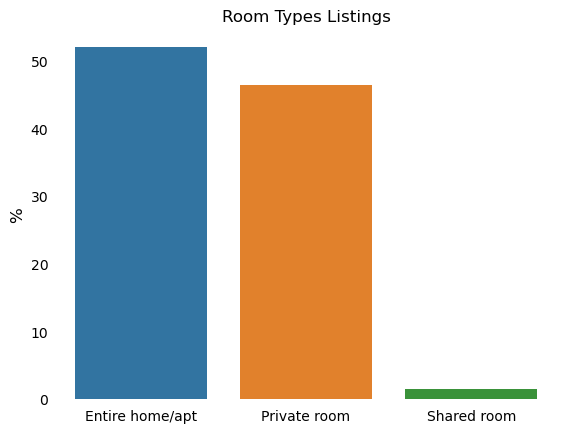

In [98]:
#visualizing the percentage of apartments for each room type

apto_room_type_pct = round(data_clean['room_type'].value_counts(normalize=True)  * 100, 2)
apto_room_type_pct

ax = sns.barplot(x=apto_room_type_pct.index, y=apto_room_type_pct.values) 
ax.set_title('Room Types Listings')
ax.set_ylabel('%', fontsize=12)
ax.set_xlabel('', fontsize=12)
ax.tick_params(bottom=False, top=False, left=False, right=False);
for kew, spine in ax.spines.items():
    spine.set_visible(False)

In [106]:
#Checking mean price according to neighbourhood
price_neighbourhood = round(data_clean.groupby('bairro_group').price.median(), 2).sort_values(ascending=False)
price_neighbourhood

bairro_group
Manhattan        140.0
Brooklyn          95.0
Staten Island     80.0
Queens            79.0
Bronx             75.0
Name: price, dtype: float64

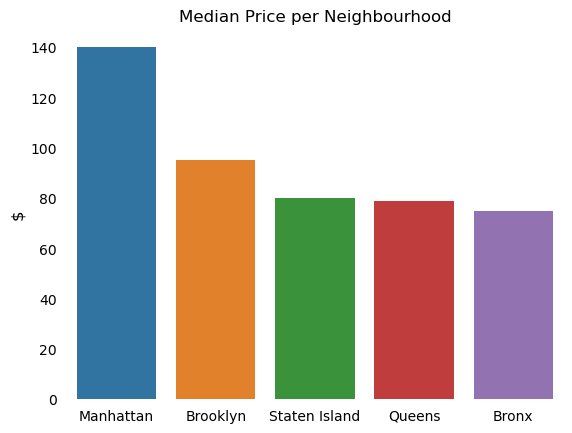

In [107]:
#visualizing the median price for each neighbourhood
ax = sns.barplot(x=price_neighbourhood.index, y=price_neighbourhood.values) 
ax.set_title('Median Price per Neighbourhood')
ax.set_ylabel('$', fontsize=12)
ax.set_xlabel('', fontsize=12)
ax.tick_params(bottom=False, top=False, left=False, right=False);
for kew, spine in ax.spines.items():
    spine.set_visible(False)

In [68]:
#Checking the number of apartments in each neighbourhood
apto_neighbourhood = data_clean['bairro_group'].value_counts().sort_values(ascending=False)
apto_neighbourhood

Manhattan        19220
Brooklyn         18265
Queens            5056
Bronx              904
Staten Island      312
Name: bairro_group, dtype: int64

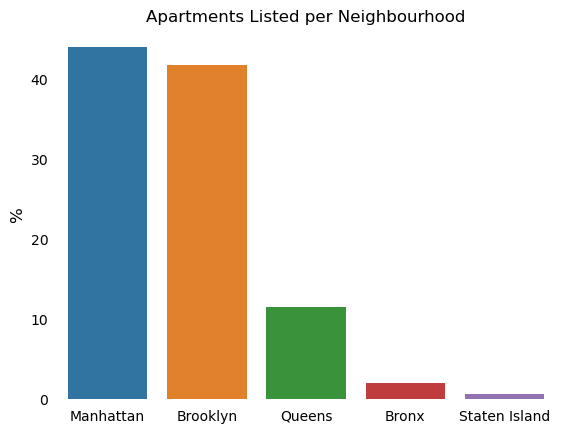

In [99]:
#visualizing the percentage of apartments for each neighbourhood

apto_neighbourhood_pct = round(data_clean['bairro_group'].value_counts(normalize=True)  * 100, 2)
apto_neighbourhood_pct

ax = sns.barplot(x=apto_neighbourhood_pct.index, y=apto_neighbourhood_pct.values) 
ax.set_title('Apartments Listed per Neighbourhood')
ax.set_ylabel('%', fontsize=12)
ax.set_xlabel('', fontsize=12)
ax.tick_params(bottom=False, top=False, left=False, right=False);
for kew, spine in ax.spines.items():
    spine.set_visible(False)

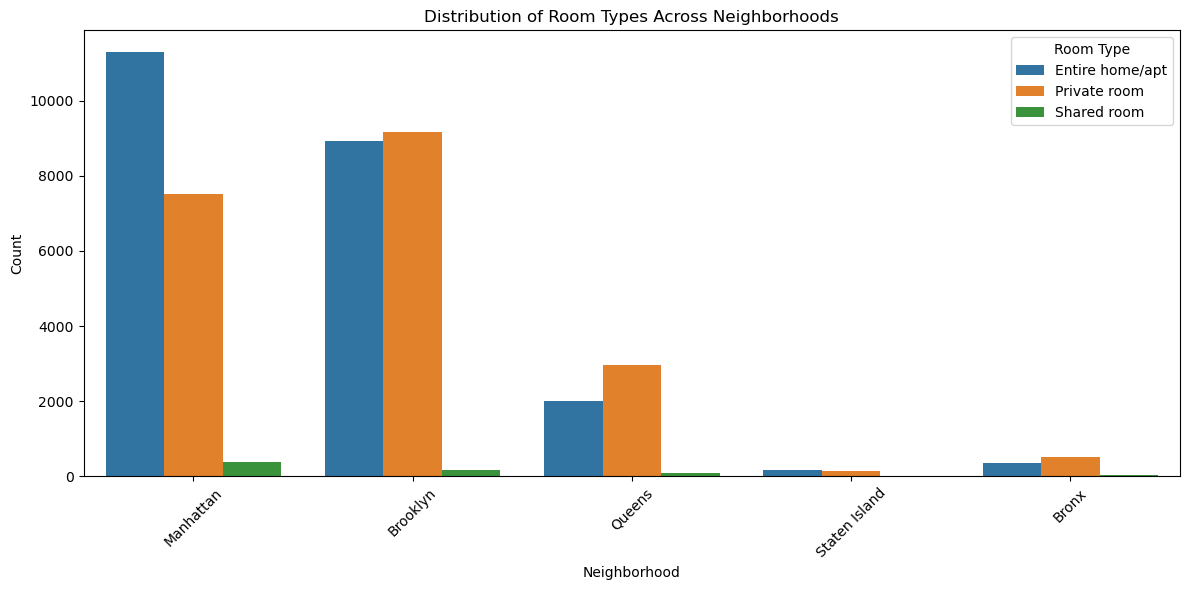

In [105]:
#Room type according to neighbourhood
plt.figure(figsize=(12, 6))
sns.countplot(data=data_clean, x='bairro_group', hue='room_type')

plt.xlabel('Neighborhood')  
plt.ylabel('Count') 
plt.title('Distribution of Room Types Across Neighborhoods')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Room Type')  
plt.tight_layout() 
plt.show()

In [118]:
#Checking median minimun nights across room types
night_room_types = round(data_clean.groupby('room_type').minimo_noites.median(), 2).sort_values(ascending=False)
night_room_types

room_type
Entire home/apt    3.0
Private room       2.0
Shared room        1.0
Name: minimo_noites, dtype: float64

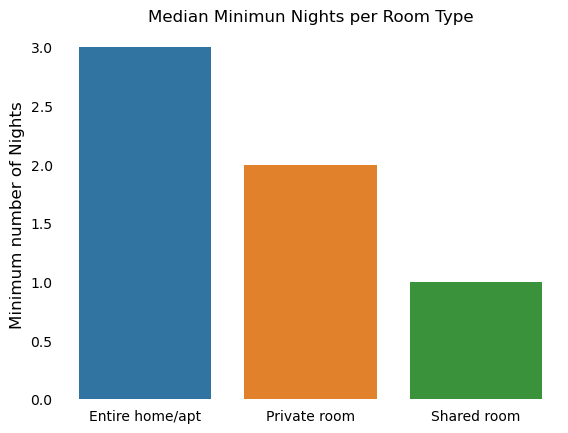

In [109]:
#visualizing the median minimun nights across room types
ax = sns.barplot(x=night_room_types.index, y=night_room_types.values) 
ax.set_title('Median Minimun Nights per Room Type')
ax.set_ylabel('Minimum Number of Nights', fontsize=12)
ax.set_xlabel('', fontsize=12)
ax.tick_params(bottom=False, top=False, left=False, right=False);
for kew, spine in ax.spines.items():
    spine.set_visible(False)

In [119]:
#Checking median number of reviews across neighbourhoods
reviews_neighbourhood = round(data_clean.groupby('bairro_group').numero_de_reviews.median(), 2).sort_values(ascending=False)
reviews_neighbourhood

bairro_group
Staten Island    12.0
Bronx             9.5
Queens            8.0
Brooklyn          6.0
Manhattan         5.0
Name: numero_de_reviews, dtype: float64

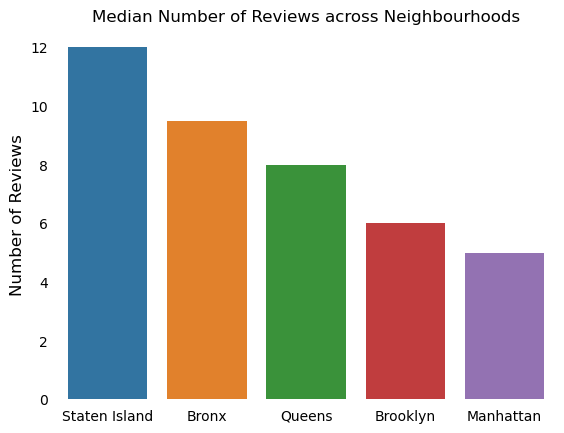

In [120]:
#visualizing the median number of reviews across neighbourhoods
ax = sns.barplot(x=reviews_neighbourhood.index, y=reviews_neighbourhood.values) 
ax.set_title('Median Number of Reviews across Neighbourhoods')
ax.set_ylabel('Number of Reviews', fontsize=12)
ax.set_xlabel('', fontsize=12)
ax.tick_params(bottom=False, top=False, left=False, right=False);
for kew, spine in ax.spines.items():
    spine.set_visible(False)

In [232]:
#Checking median number of reviews per month across neighbourhoods
reviews_mes_neighbourhood = round(data_clean.groupby('bairro_group').reviews_por_mes.median(), 2).sort_values(ascending=False)
reviews_mes_neighbourhood

bairro_group
Staten Island    1.53
Bronx            1.45
Queens           1.25
Brooklyn         0.68
Manhattan        0.61
Name: reviews_por_mes, dtype: float64

In [234]:
#Checking median number of reviews per month across neighbourhoods
disponibilidade_neighbourhood = round(data_clean.groupby('bairro_group').disponibilidade_365.median(), 2).sort_values(ascending=False)
disponibilidade_neighbourhood

bairro_group
Staten Island    190.0
Bronx            156.5
Queens            95.0
Manhattan         27.0
Brooklyn          25.0
Name: disponibilidade_365, dtype: float64

In [122]:
data_clean['price'].describe(percentiles=percentiles)

count                 43757.000000
mean                    126.626163
std                      70.908505
min                      40.000000
5%                       46.000000
10%                      50.000000
15%                      60.000000
20%                      65.000000
25%                      70.000000
30%                      77.000000
35%                      85.000000
40%                      90.000000
44.99999999999999%      100.000000
49.99999999999999%      105.000000
50%                     105.000000
54.99999999999999%      120.000000
60%                     125.000000
65%                     140.000000
70%                     150.000000
75%                     165.000000
80%                     185.000000
85%                     200.000000
90%                     230.000000
95%                     275.000000
100%                    355.000000
max                     355.000000
Name: price, dtype: float64

In [156]:
#Tranformin name as a string 
data_clean['nome'] = data_clean['nome'].astype(str)

/var/folders/lb/jn0_yd757mv8ffnbpc95m9h40000gn/T/ipykernel_25103/2067792696.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [191]:
# Define a function to filter tokens based on price
def filter_tokens_by_price(names, prices, price_threshold):
    filtered_tokens = []
    for name, price in zip(names, prices):
        if price > price_threshold:
            # Use regex to extract tokens from the name
            tokens = re.findall(r'\b\w{4,}\b', name.lower())
            filtered_tokens.extend(tokens)
    return filtered_tokens

In [196]:
#Define price trhreshold
price_threshold = data_clean['price'].quantile(.95)

In [197]:
# Filter tokens based on price
filtered_tokens = filter_tokens_by_price(data_clean['nome'], data_clean['price'], price_threshold)

In [198]:
# Frequency analysis
word_counts = Counter(filtered_tokens)
common_words = word_counts.most_common(20)  # Get most common words

In [199]:
print("Most common words in listing names for prices above the threshold:")
for word, count in common_words:
    print(f"{word}: {count}")


Most common words in listing names for prices above the threshold:
bedroom: 317
apartment: 269
village: 181
luxury: 166
spacious: 162
loft: 162
park: 159
east: 158
manhattan: 151
with: 145
west: 127
midtown: 120
central: 115
modern: 115
private: 114
blueground: 112
williamsburg: 107
heart: 106
duplex: 100
beautiful: 100


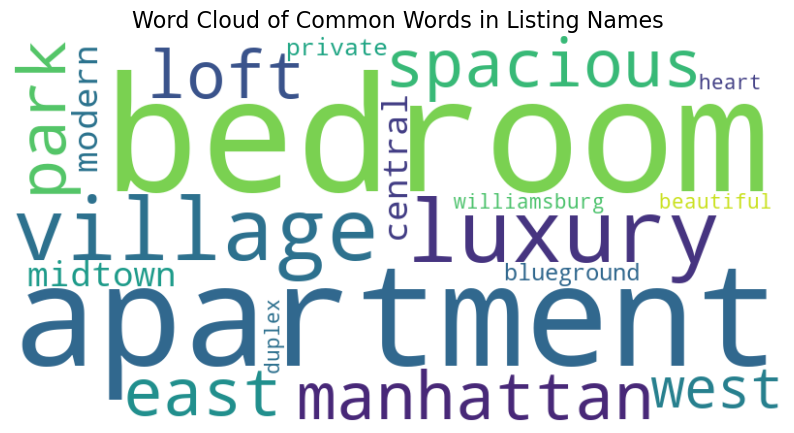

In [204]:
#Convert the list of common words into a string
text = ' '.join(word for word, _ in common_words)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Word Cloud of Common Words in Listing Names', fontsize=16)
plt.show()

In [ ]:
Most common words in listing names for prices above the threshold:
apartment: 3764
bedroom: 3502
studio: 2625
east: 1954
private: 1813
spacious: 1811
cozy: 1666
village: 1647
park: 1630
brooklyn: 1594
manhattan: 1465
with: 1353
williamsburg: 1271
room: 1248
beautiful: 1190
sunny: 1166
heart: 1131
loft: 1115
luxury: 1070
west: 1069
    
Most common words in listing names for prices above the threshold:
room: 7880
private: 4983
bedroom: 3955
cozy: 2998
apartment: 2472
brooklyn: 2165
manhattan: 1724
spacious: 1680
sunny: 1538
with: 1421
williamsburg: 1304
studio: 1245
park: 1181
near: 1147
beautiful: 1093
large: 1049
bushwick: 1031
east: 947
from: 936
home: 897